In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

MILISECONDS_IN_HOUR = 3600000

In [11]:
fragments = pd.read_parquet("fragments.parquet")
tasks = pd.read_parquet("tasks.parquet")

In [12]:
fragments = fragments.groupby("id").sum()
fragments

,duration,cpu_count,cpu_usage
id,,,
2132819,2100000,1120,513723.0
2132820,870000,464,62475.0
2132821,30000,16,33600.0
2132822,30000,16,33600.0
2132823,30000,16,33600.0
...,...,...,...
2177927,149430000,79696,159231261.0
2177928,149430000,79696,159245709.0
2177929,149430000,79696,159239850.0


In [13]:
tasks

,id,submission_time,duration,cpu_count,cpu_capacity,mem_capacity
0,2133099,2022-10-06 22:00:00,27935000,16,33600.0,100000
1,2133100,2022-10-06 22:00:00,27935000,16,33600.0,100000
2,2133101,2022-10-06 22:00:00,27935000,16,33600.0,100000
3,2133102,2022-10-06 22:00:00,27935000,16,33600.0,100000
4,2133111,2022-10-06 22:00:00,27935000,16,33600.0,100000
...,...,...,...,...,...,...
7845,2135095,2022-10-06 22:00:00,97864000,16,33600.0,100000
7846,2135096,2022-10-06 22:00:00,97864000,16,33600.0,100000
7847,2135097,2022-10-06 22:00:00,97864000,16,33600.0,100000
7848,2135098,2022-10-06 22:00:00,97864000,16,33600.0,100000


In [14]:
# Calculate total CPU hours from tasks
tasks['cpu_hours'] = (tasks['cpu_count'] * tasks['duration']) / MILISECONDS_IN_HOUR
total_cpu_hours = tasks['cpu_hours'].sum()

print(f"Total CPU hours: {total_cpu_hours}")

Total CPU hours: 310237.79555555555


Average job duration (h): 2.4700461429582448


{'whiskers': [<matplotlib.lines.Line2D at 0x317427590>,
 'caps': [<matplotlib.lines.Line2D at 0x31726f310>,
 'boxes': [<matplotlib.lines.Line2D at 0x317201f50>],
 'medians': [<matplotlib.lines.Line2D at 0x31726c8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x31726e5d0>],
 'means': []}

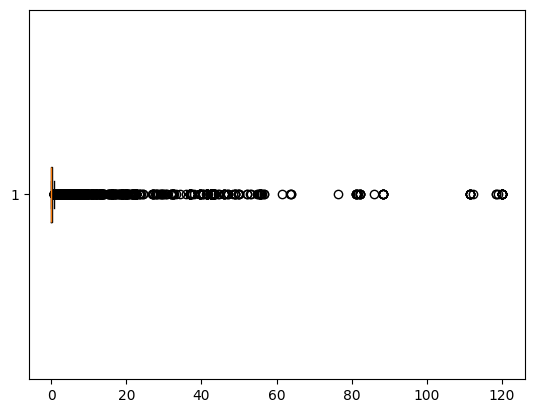

In [15]:
average_job_duration = tasks['duration'].mean()
print(f"Average job duration (h): {average_job_duration / MILISECONDS_IN_HOUR}")

plt.boxplot(tasks['duration'] / MILISECONDS_IN_HOUR, vert=False)

In [16]:
validation = pd.read_parquet("validation.parquet")
validation

,host,power_draw,energy_usage,timestamp
0,r27n18,44.0,1320.0,30000
1,r27n18,44.0,1320.0,60000
2,r27n18,44.0,1320.0,90000
3,r27n18,44.0,1320.0,120000
4,r27n18,44.0,1320.0,150000
...,...,...,...,...
3260563,r27n9,32.0,960.0,-152940000
3260564,r27n9,32.0,960.0,46980000
3260565,r27n9,32.0,960.0,35700000
3260566,r27n9,32.0,960.0,-217920000


In [17]:
host = pd.read_parquet('host.parquet')
host

,timestamp,timestamp_absolute,host_id,host_name,core_count,mem_capacity,guests_terminated,guests_running,guests_error,guests_invalid,...,cpu_time_steal,cpu_time_lost,power_draw,energy_usage,carbon_intensity,carbon_emission,uptime,downtime,boot_time,boot_time_absolute
0,30000,1665093630000,629bc222-9cef-e94d-0000-00000000011b,A01,16,128000000,0,1,0,0,...,0,0,174.000,5220.00,152.480506,0.221097,30000,0,1665093600000,NaN
1,30000,1665093630000,566c318d-9683-8344-0000-000000000226,A01,16,128000000,0,0,0,0,...,0,0,25.000,750.00,152.480506,0.031767,30000,0,1665093600000,NaN
2,30000,1665093630000,46f73c54-f05a-8b8a-0000-000000000170,A01,16,128000000,0,1,0,0,...,0,0,33.195,995.85,152.480506,0.042180,30000,0,1665093600000,NaN
3,30000,1665093630000,08dbf616-bfb4-a567-0000-00000000021d,A01,16,128000000,0,0,0,0,...,0,0,25.000,750.00,152.480506,0.031767,30000,0,1665093600000,NaN
4,30000,1665093630000,ab360cac-f249-3813-0000-0000000001c8,A01,16,128000000,0,0,0,0,...,0,0,25.000,750.00,152.480506,0.031767,30000,0,1665093600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5587085,605070000,1665698670000,8a1f265e-9a16-064f-0000-0000000001ee,A01,16,128000000,0,0,0,0,...,0,0,25.000,0.00,199.220248,0.000000,0,0,1665093600000,NaN
5587086,605070000,1665698670000,77053a50-d5f4-855e-0000-000000000208,A01,16,128000000,0,0,0,0,...,0,0,25.000,0.00,199.220248,0.000000,0,0,1665093600000,NaN
5587087,605070000,1665698670000,e6bd9163-9c8d-9aaa-0000-000000000202,A01,16,128000000,0,0,0,0,...,0,0,25.000,0.00,199.220248,0.000000,0,0,1665093600000,NaN
5587088,605070000,1665698670000,006b8539-9898-c3c4-0000-0000000001f2,A01,16,128000000,0,0,0,0,...,0,0,25.000,0.00,199.220248,0.000000,0,0,1665093600000,NaN


In [50]:
# Load the dataset
validation = pd.read_parquet("surfsara-validation.parquet")
validation = validation.groupby('timestamp').sum().reset_index()

validation['timestamp'] = pd.to_datetime(validation['timestamp'])

ref_time = validation['timestamp'].iloc[0]
validation['milliseconds'] = (validation['timestamp'] - ref_time).dt.total_seconds() * 1000 + 30000

validation.rename(columns={'timestamp': 'timestamp-date-time', 'milliseconds': 'timestamp'}, inplace=True)

# Convert 'timestamp' column to int64 for storing large integers
validation['timestamp'] = validation['timestamp'].astype(int)

# remove the column datetime
validation.drop(columns=['timestamp-date-time'], inplace=True)

validation.to_parquet("validation.parquet")